In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from imutils.perspective import four_point_transform
from imutils.contours import sort_contours
import imutils
import re
import requests
from PIL import Image 
import pytesseract

높이, 폭 출력 : (2339, 1653)
로고 템플릿 매칭도 : [0.7078022360801697, (322, 147), 132, 126]
바코드 템플릿 매칭도 : [0.38622400164604187, (1153, 344), 405, 56]


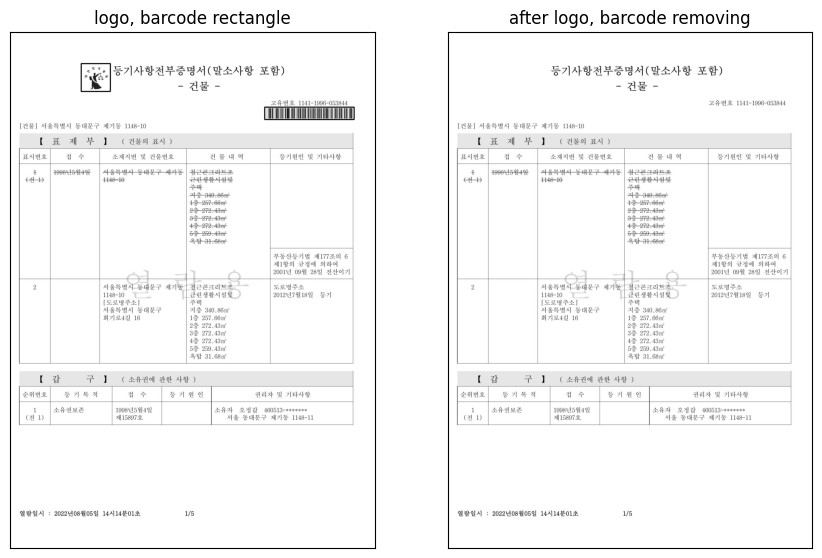

In [144]:
# 1.로고랑 바코드 크기 조정해서 템플릿 영역 없애기

# input 이미지의 폭에 기준해 템플릿 크기 조정
img2 = cv2.imread('sample_input/page_0.jpg',cv2.IMREAD_GRAYSCALE)
print('높이, 폭 출력 : '+str(img2.shape)) 

startIdx = img2.shape[1] / 15000
endIdx = img2.shape[1] / 6000

startIdx2 = img2.shape[1] / 6000
endIdx2 = img2.shape[1] / 3500

findValue = None
findValue2 = None


for scale in np.linspace(startIdx,endIdx,20)[::-1]:
    template = cv2.imread('template/logo.png', 0)
    template = cv2.resize(template,dsize=(0, 0), fx=scale,fy=scale)

    w, h = template.shape[::-1]
    
    result = cv2.matchTemplate(img2, template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    if findValue == None:
        findValue = [max_val,max_loc,w,h]
    else:
        if(findValue[0] < max_val):
            findValue = [max_val,max_loc,w,h]    

print('로고 템플릿 매칭도 : '+str(findValue))
startX, startY = findValue[1][0],findValue[1][1] # 만약 cv.TM_SQDIFF 혹은 cv.TM_SQDIFF_NORMED를 사용했을경우 최솟값을 사용해야한다.
endX, endY = startX + findValue[2], startY + findValue[3]
cv2.rectangle(img2, (startX, startY), (endX, endY), (0,0,255), 3)


for scale in np.linspace(startIdx2,endIdx2,20)[::-1]:
    template = cv2.imread('template/barcode.png', 0)
    template = cv2.resize(template,dsize=(0, 0), fx=scale,fy=scale)

    w, h = template.shape[::-1]
    
    result = cv2.matchTemplate(img2, template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    if findValue2 == None:
        findValue2 = [max_val,max_loc,w,h]
    else:
        if(findValue2[0] < max_val):
            findValue2 = [max_val,max_loc,w,h]    

print('바코드 템플릿 매칭도 : '+str(findValue2))
startX, startY = findValue2[1][0],findValue2[1][1] # 만약 cv.TM_SQDIFF 혹은 cv.TM_SQDIFF_NORMED를 사용했을경우 최솟값을 사용해야한다.
endX, endY = startX + findValue2[2], startY + findValue2[3]
cv2.rectangle(img2, (startX, startY), (endX, endY), (0,0,255), 3)



pltshow = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,10))
plt.subplot(1, 3, 1), plt.imshow(pltshow)
plt.title('logo, barcode rectangle')
plt.xticks([]), plt.yticks([])


img2 = cv2.imread('sample_input/page_0.jpg',cv2.IMREAD_GRAYSCALE)

startX, startY = findValue[1][0],findValue[1][1] # 만약 cv.TM_SQDIFF 혹은 cv.TM_SQDIFF_NORMED를 사용했을경우 최솟값을 사용해야한다.
endX, endY = startX + findValue[2], startY + findValue[3]

cv2.rectangle(img2, (startX, startY), (endX, endY), (255,255,255), -1)

startX, startY = findValue2[1][0],findValue2[1][1] # 만약 cv.TM_SQDIFF 혹은 cv.TM_SQDIFF_NORMED를 사용했을경우 최솟값을 사용해야한다.
endX, endY = startX + findValue2[2], startY + findValue2[3]

cv2.rectangle(img2, (startX, startY), (endX, endY), (255,255,255), -1)
pltshow = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.subplot(1, 3, 2), plt.imshow(pltshow)
plt.title('after logo, barcode removing')
plt.xticks([]), plt.yticks([])


plt.show()


In [ ]:
# 2. 워터마크 제거 및 표 위치 저장과 제거
_,img_bin = cv2.threshold(img2,150,225,cv2.THRESH_BINARY)
img_bin=~img_bin
imgRGB = cv2.cvtColor(img_bin, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(imgRGB) 
plt.show()

In [74]:
# 이미지 내 텍스트 크기 검사해서 평균 글자 크기가 20px 이상, 300dpi 이상으로 조정



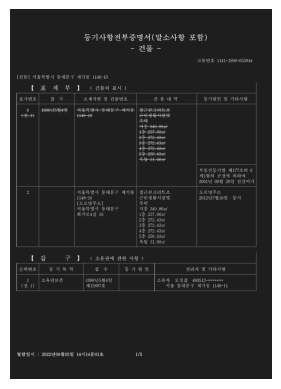

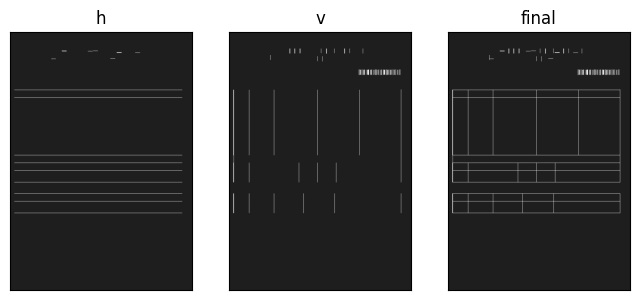

In [79]:
imgRGB = cv2.cvtColor(img_bin_h, cv2.COLOR_BGR2RGB)
imgRGB2 = cv2.cvtColor(img_bin_v, cv2.COLOR_BGR2RGB)
imgRGB3 = cv2.cvtColor(img_bin_final, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,5))
plt.subplot(1, 3, 1), plt.imshow(imgRGB)
plt.title('h')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2), plt.imshow(imgRGB2)
plt.title('v')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3), plt.imshow(imgRGB3)
plt.title('final')
plt.xticks([]), plt.yticks([])

plt.show()

In [77]:
### selecting min size as 15 pixels
line_min_width = 15
kernal_h = np.ones((1,line_min_width), np.uint8)
kernal_v = np.ones((line_min_width,1), np.uint8)

In [78]:
# Horizontal Kernel, Vertical Kernel
img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)
img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

# MIX Kernel
img_bin_final=img_bin_h|img_bin_v

In [80]:
final_kernel = np.ones((3,3), np.uint8)
img_bin_final=cv2.dilate(img_bin_final, final_kernel, iterations=1)

In [81]:
_, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)

n1 = np.array(stats[2:])

In [88]:
for x,y,w,h,area in stats[2:]:
        # print(f"x: {x}, y: {y}, w: {w}, h: {h}, pixel: {area}, x+w: {x+w}, y+h: {y+h}")
        cv2.rectangle(image,(x,y), (x+w, y+h),(0,255,0), 6)

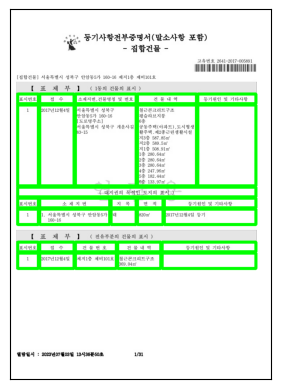

In [89]:
plt.imshow(image)
plt.xticks([]), plt.yticks([])
plt.show()

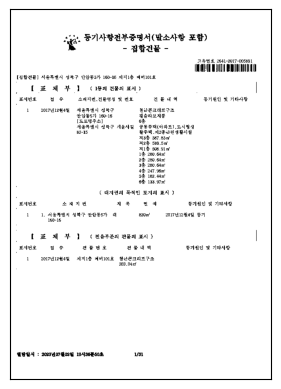

In [90]:
import cv2
import numpy as np

# load image with alpha channel
img = image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# extract bgr channels
bgr = img[:,:,0:3]

# select grayscale range
mask = cv2.inRange(bgr, (0,190,0), (255,255,255))

# change the image to make it green where the mask is white
bgr_new = bgr.copy()

# BGR이라서 255, 0, 0
bgr_new[mask!=255] = (255,255,255)

# save output
# cv2.imwrite('bgr_new.png', bgr_new)
rgbImg = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(rgbImg)
plt.xticks([]), plt.yticks([])
plt.show()

In [56]:
a = [i[0] for i in stats[2:]]
min_x = min(a)
b = [i[1] for i in stats[2:]]
min_y = min(b)

xw = n1[:, [0,2]].sum(axis=1).max()
yh = n1[:, [1,3]].sum(axis=1).max()


im = Image.open("sample_input/testImg.jpg") 
image = np.asarray(im, dtype=np.uint8)
    
cv2.rectangle(image,(min_x, min_y),(xw, yh),(0,0,255), 2)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

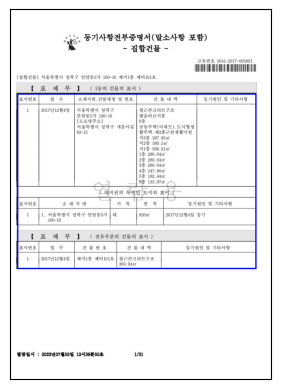

In [57]:
plt.imshow(image)
plt.xticks([]), plt.yticks([])
plt.show()



In [19]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

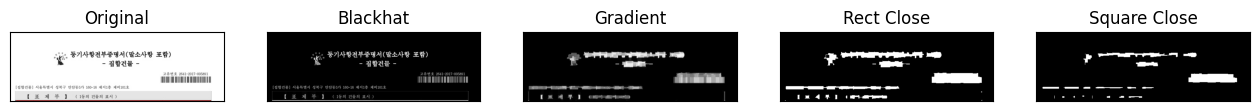

In [20]:
    
gray = cv2.cvtColor(front, cv2.COLOR_BGR2GRAY)
(H, W) = gray.shape
 
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))
sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
 
# gray = cv2.GaussianBlur(gray, (1, 1), 0)
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)
 
grad = cv2.Sobel(blackhat, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
grad = np.absolute(grad)
(minVal, maxVal) = (np.min(grad), np.max(grad))
grad = (grad - minVal) / (maxVal - minVal)
grad = (grad * 255).astype("uint8")
 
grad = cv2.morphologyEx(grad, cv2.MORPH_CLOSE, rectKernel)
thresh = cv2.threshold(grad, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
 
close_thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, sqKernel)
close_thresh = cv2.erode(close_thresh, None, iterations=2)
 
plt_imshow(["Original", "Blackhat", "Gradient", "Rect Close", "Square Close"], [front, blackhat, grad, thresh, close_thresh], figsize=(16, 10))

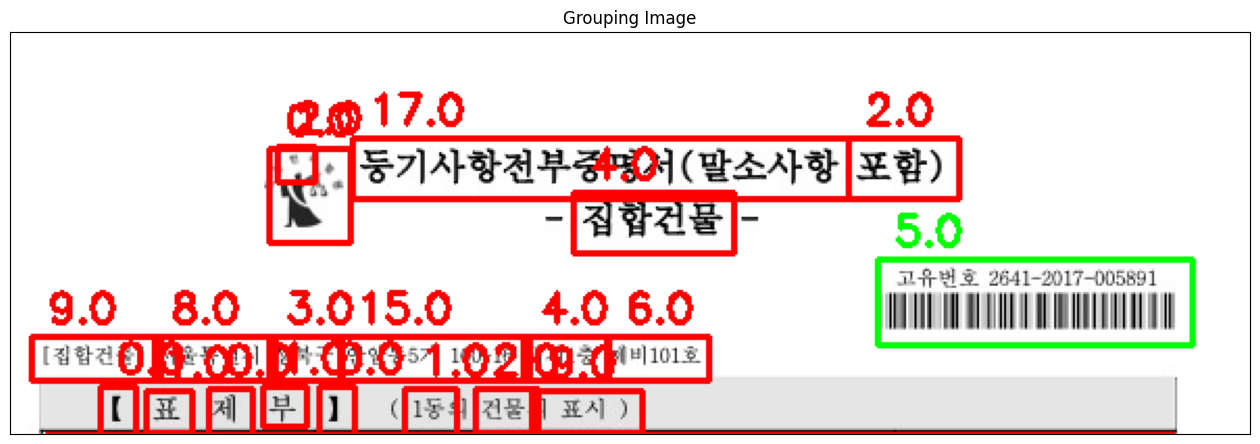

In [21]:
cnts = cv2.findContours(close_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="top-to-bottom")[0]
 
roi_list = []
roi_title_list = []
 
margin = 8
receipt_grouping = front.copy()
 
for c in cnts:
  (x, y, w, h) = cv2.boundingRect(c)
  ar = w // float(h)
 
  if ar > 3.0 and ar < 6.5 and (W/2) < x:
    color = (0, 255, 0)
    roi = front[y - margin:y + h + margin, x - margin:x + w + margin]
    roi_list.append(roi)
    roi_title_list.append("Roi_{}".format(len(roi_list)))
  else:
    color = (0, 0, 255)
 
  cv2.rectangle(receipt_grouping, (x - margin, y - margin), (x + w + margin, y + h + margin), color, 2)
  cv2.putText(receipt_grouping, "".join(str(ar)), (x, y - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.65, color, 2)

plt_imshow(["Grouping Image"], [receipt_grouping], figsize=(16, 10))

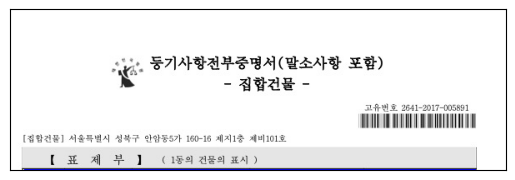

In [22]:
front = image[0: min_y, 0:]
plt.imshow(front)
plt.xticks([]), plt.yticks([])
plt.show()

In [93]:
rgbImg = cv2.resize(rgbImg,dsize=(0, 0), fx=8.0,fy=8.0)

In [101]:
rgbImg = cv2.resize(rgbImg,dsize=(0, 0), fx=2.0,fy=2.0)

In [102]:
import pandas as pd
custom_config = '--psm 6 --tessdata-dir "src/"'
merge_Img_text = pytesseract.image_to_data(rgbImg ,lang='kor',output_type='data.frame',config= custom_config)

In [105]:
#6
print(merge_Img_text[merge_Img_text['line_num']==1].text)

3     NaN
4      "나
5       둥
6       기
7       사
8       향
9       전
10      부
11      중
12      명
13      서
14      (
15      발
16      소
17      사
18      항
19    포함)
Name: text, dtype: object


In [ ]:
import pandas as pd
custom_config = '--psm 6'
merge_Img_text = pytesseract.image_to_data(front ,lang='kor',output_type='data.frame',config= custom_config)

In [97]:
#6
print(merge_Img_text[merge_Img_text['line_num']==2].text)

19    NaN
20      -
21      집
22      합
23     건물
24      -
Name: text, dtype: object


In [ ]:
merge_Img_text
merge_Img_text = merge_Img_text.dropna(subset=['text'],axis=0)

In [ ]:
merge_Img_text['top'].value_counts(sort = False).sort_index()

top
108     2
112     9
113     2
114     3
115     1
127     1
136     1
163     3
164     1
178     2
224     1
228     2
230     2
297     8
301     7
302    12
304     1
348     2
349     2
350     1
351     1
352     7
353     1
354     1
Name: count, dtype: int64

In [29]:
str = '가각간갇갈갉갊감갑값갓갔강갖갗같갚갛걜객갠갤갬갭갯갰갱갸갹갼걀걋걍걔걘걜걱건 걺검겁것겄겅겆겉겊겋게겐겔겜겝겟겠겡겨격겪견겯결겸겹겻겼경계곈곌곕곗고곡곤곧골곪 곬곯곰곱곳공곶과곽관괄괆괌 괍괏광괘괜괠괩괬괭괴괵괸괼굄굅굇굉교굔굘굡굣구국군굳굴굵굶굻굼굽굿궁궂궈궉권궐궜궝 궤궷귀귁귄귈귐귑귓규균귤그극근귿글긁금급긋긍긔긱긴긷길긺김깁깃깅깆깊까깍깎깐깔깖 깜깝깟깠깡깥깨깩깬깰깸깹깻깼깽꺄꺅꺌 꺼꺽꺾껀껄껌껍껏껐껑께껙껜껨껫껭껴껸껼꼇꼈꼍꼐꼬꼭꼰꼲꼴꼼꼽꼿꽁꽂꽃꽈꽉꽐꽜꽝꽤 꽥꽹꾀꾄꾈꾐꾑꾕꾜꾸꾹꾼꿀꿇꿈꿉꿋꿍꿎꿔꿜꿨꿩꿰꿱꿴꿸뀀뀁뀄뀌뀴뀜뀝뀨끄끅끈늁끌뎁 끓끔끕끗끙끝끼끽낀낄낌낍낏낑나낙낚 난낟날낡낢남납낫났낭낮낯낱낳내낵낸낼냄냅냇냈냉냐냑냔냘냠냥너넉넋넌널넒넓넘넙넛넜 넝넣네넥넨넬넴넵넷넸넹녀녁년녈념녑녔녕녘녜녠노녹논놀놂놈놉놋놓놔놘놜놨뇌뇐뇔 뇝뇟뇨뇩뇬뇰뇹뇻뇽누눅눈눋눌눔눕눗눙눠 눴눼뉘뉜뉠뉨뉩뉴뉵뉼늄늅늉느늑는늘늙늚늠늡늣능늦늪늬늰늴니닉닌닐닒님닙닛닝닢다닥닦 단닫달닭닮닯닳담답닷닸당닺닻닿대댁댄댈댐댑댓댔댕댜더덕덖던덛덜덞덟덤덥덩덫덮데덱 덴델뎀뎁뎃뎄뎅뎌뎐뎔뎠뎡뎨뎬도독 돈돋돌돎돐돔돕돗동돛돝돠돤돨됐되된될됨됩됫됬됴두둑둔둘둠둡둣둬뒀뒝뒤뒨뒬뒵뒷 뒹듀듄듈듐듕드득든듣들듦듬듭듯등듸디딕딘딛딤딥딧딨딩딪따딱딴딸땀땁땃땄땅땋때땍땐 땔땜땝땟땠땡떠떡떤떨 떪떫떰떱떳떴떵떻떼떽뗀뗄뗌뗍뗏뗐뗑뗘뗬또똑똔똘똥똬똴뙈뙤뙨뚜뚝뚠뚤뚫뚬뚔뛰뛴뛸 뜀뜁뜅뜨뜩뜬뜯뜰뜸뜹뜻띄띈띌띔띕띠띤띨띰띱띳띵라락란랄람랍랏랐랑랒랖랗래랙랜랠램랩 랫랬랭랴략랸럇량러럭런럴럼럽럿렀렁 렇레렉렌렐렘렙렛렝려력련렬렴렵렷렸령례롄롑롓로록론롤롬롭롯롱롸롼뢍뢨뢰뢴뢸룀룁룃 룅료룐룔룝룟룡루룩룬룰룸룹룻룽뤄뤘뤠뤼뤽륀륄륌륏륑류륙륜률륨륩륫륭르륵른를름릅릇릉 릊릍릎리릭린릴림립릿링마막만많 맏말맑맒맘맙맛망맞맡맣매맥맨맬맴맵맷맸맹맺먀먁먈먕머먹먼멀멂멈멉멋멍메메멩멕멘멜 멤멥멧멨멩며멱면멸몃몄명몇몌모목몫몬몰몲몸몹못몽뫄뫈뫘뫙뫼묀묄묍묏묘묜묠묩무묵 묶문묻물묽묾뭄뭅뭇뭉뭍뭏뭐뭔뭘뭡뭣뭬뮈뮌뮐뮤뮨뮬뮴뮷므믄믈믐믓미믹민믿밀밂밈밉밋밌 밍및밑바박밖밗반받발밝밞밟밤밥밧방밭배백밴밸뱀뱁뱃뱄뱅뱉뱌뱍뱝번번벋법법벎 벙벚베벡벤벧벨벰벱벳벴벵벼벽 변별볍볏볐병볕볘볜보복볶본볼봄봅봇봉봐봔봤봬뵀뵈뵉뵌뵐뵘뵙뵤부북분붇불붉붊붐붑붓 붕붙붚붜붤붰붸뷔뷕뷘뷜뷩뷰뷴뷸븀븃븅브븍븐블븜븝븟비빅빈빌빎빔빕빗빙빚빛빠빡빤빨몹 빰빱빳빴빵빻빼빽뺀뺄뺌뺍뺏뺐뺑뺘 뺙뺨뻐뻑뻔뻗뻘뻠뻤뻥뻬뼁뼈뼉뼘뼙뼛뼜뼝뽀뽁뽄뽈뽐뽑뽕뾔뾰뿅뿌뿍뿐뿔뿜뿟뿡쀼쁑쁘 쁜쁠쁨쁩삐삑삔삘삠삡삣삥삭삯산삳살삵삶삼삽삿샀상샅새색샌샐샘샙샛샜생샤샥샨샬샵샷 샹섀섄섈섐섕서석섞섟선섣설섦섧 섬섭섯섰성섶세섹센셀셈셉셋셌셍셔셕션셜셤셥셧셨셩셴셸솅소속솎손솔솖솜솝솟송솥솨 솩솬솰솽쇄쇈쇌쇔쇗쇘쇠쇤쇨쇰쇱쇳쇼쇽숀숄숌숍숏숑수숙순숟술숨숩숫숭숯숱숲숴쉈쉐쉑쉔 쉘쉠쉥쉬쉭쉰쉴쉼쉽쉿슁슈슉슐슘슛슝스슥 슨슬슭슴습슷승시식신싣실싫심십싯싱싶싸싹싻싼쌀쌈쌉쌌쌍쌓쌔쌕쌘쌜쌤쌥쌨쌩썅써썩썬 썰썲썸썹썼썽쎄쎈쎌쏘쏙쏜쏟쏠쏢쏨쏩쏭쏴쏵쏸쐈쐐쐤쐬쐰쐴쐼쐽쑈쑤쑥쑨쑬쑴쑵쑹쒀쒔쒜 쒸쒼쓩쓰쓱쓴쓸쓺쓿씀씁씌씐씔씜씨씩 씬씰씸씹씻씽아악안앉않알앍앎앓암압앗았앙앝앞애액앤앨앰앱앳앴앵야약얀얄얇얌얍얏양얕 얗얘얜얠얩어억언얹얻얼얽얾엄업없엇었엉엊엌엎에엑엔엘엠엡엣엥여역엮연열엶엷염엽엾엿 였영옅옆옇예옌옐옘옙옛옜 오옥온올옭옮옰옳옴옵옷옹옻와왁완왈왐왑왓왔왕왜왝왠왬왯외왹왼욀욈욉욋욍요욕욘욜 욤욥욧용우욱운울욹욺움웁웃웅워웍원월웜웝웠웡웨웩웬웰웸웹웽위윅윈윌윔윕윗윙유육윤율윰 윱윳융윷으윽은을읊음읍읏응읒읓 읔읕읖읗의읜읠읨읫이익인일읽읾잃임입잇있잉잊잎자작잔잖잗잘잚잠잡잣잤장잦재잭잰잴잼 잽잿쟀쟁쟈쟉쟌쟎쟐쟘쟝쟤쟨쟬저적전절젊점접젓정젖제젝젠젤젬젭젯젱져젼졀졈졉졌졍졔조 족존졸졺좀좁좃종좆좇좋좌좍좔 좝좟죽준줅줆줌줍줏중줘줬줴쥐쥑쥔쥘쥠쥡쥣쥬쥰쥴쥼 즈즉즌즐즘즙즛증지직진짇질짊짐집짓징짖짙짚짜짝짠짢짤짧짬짭짯짰짱째짹짼쨀쨈쨉쨋쨌쨍 쨔쨘쨩쩌쩍쩐쩔쩜쩝쩟쩠쩡쩨쩽쪄쪘쪼쪽쫀쫄쫌쫍쫏쫑쫓쫘쫙쫠쫬쫴쬈쬔쬘쬠쬡쭁쭈쭉쭌쭐쭘쭙 쭝쭤쭸쭹쮜쮸쯔쯤쯧쯩찌찍찐찔찜찝찡찢찧차착찬찮찰참찹찻찼창찾채책챈챔챕챗챘챙챠챤 챦챨챰챵처척천철첨첩첫첬청체첵첸 첼쳄쳅쳇쳉쳐쳔쳤쳬쳰촁초촉촌촐촘촙촛총촤촨촬촹최쵠쵤쵬쵭쵯쵱쵸춈추축춘출춤춥춧충 춰췄췌췐취췬췰췸췹췻췽츄츈츌츔츙츠측츤츨츰츱츳층치칙친칟칠칡침칩칫칭카칵칸칼캄캅캇 캉캐캑캔캘캠캡캣캤캥캬캭컁커컥컨컫컬컴 컵컷컸컹케켁켄켈켐켑켓켕켜켠켤켬켭켯켰켱켸코콕콘콜콤콥콧콩콰콱콴콸쾀쾅쾌쾡쾨쾰쿄 쿠쿡쿤쿨쿰쿱쿳쿵쿼퀀퀄퀑퀘퀭퀴퀵퀸퀼큄큅큇큉큐큔큘큠크큭큰클큼큽키킥킨킬킵킷 타탁탄탈탉탐탑탓탔탕태택탠탤탬탭탯탰 탱탸턍터턱턴털턺텀텁텃텄텅테텍텐텔템텝텟텡텨텬텼톄톈토톡톤톰톱톲톺톼퇀퇘퇴퇸 툇툉툐투툭툰툴툼툽툿퉁퉈퉜퉤튀튁튄튈튐튑튕튜튠튤튬튱특튼튿틀틂틈틉틔틘틜틤틥티 틴틸팀팁팃팅파팍팎판팔팖팜팝팟팠팡 팥패팩팬팰팸팹팻팼팽퍄퍅퍼퍽펀펄펌펍펏펐펑페펙펜펠펨펩펫펴편펼폄폅폈평폐폡폣 포폭폰폴폼폽폿퐁퐈퐝푀푄표푠푤푭푯푸푹푼푿풀풂품풉풋풍풔풩퓌퓐퓔퓜퓟퓨퓬퓰퓸퓻퓽 픈플픔픕픗피픽핀필핌핍핏핑하학한할 핥함합핫항핳해핵핸핼햄햅햇했행햐향허헉헌헐헒험헙헛헝헤헥헨헬헴헵헷헹혀혁현혈협 혓혔형혜혠혤혭호혹혼홀홅홈홉홋홍홑화확환활홧황홰홱홴횃횅회획횐횔횝횟횡효횬횰횹횻 훅훈훌훑훔훗훙훠훤훨훰훵훼훽휀휄 휑휘휙휜휠휨휩휫휭휴휵휸휼흄흇흉흐흑흔흖흗흘흙흠흡흣흥흩희흰흴흼흽힁히힉힌힐힘힙 힛힝힣 ㄱ ㄴ ㄷ ㄹ ㅁ ㅂ ㅅ ㅇ ㅈ ㅊ ㅋ ㅌ ㅍ ㅎ ㄲ ㄸ ㅃ ㅆ ㅉ ㄺ ㅀ ㄻ ㄼ ㅄ ㄳ ㄶ ㄵ ㄽ ㅏ ㅑ ㅓ ㅕ ㅗ ㅛ ㅜ ㅒㅖA B C D E F G H I J K L M N O P Q R S T U V W X Y Z a b c d e f g h i j k l m n o p q r s t u v w x y z 1 2 3 4 5 6 7 8 9 0 ~ ` ! @ # $ % ^ & * ( ) { } [ ] - _ = + ; : ‘ ” , < . > / ? \ |'

In [30]:
print(' '.join(str))

가 각 간 갇 갈 갉 갊 감 갑 값 갓 갔 강 갖 갗 같 갚 갛 걜 객 갠 갤 갬 갭 갯 갰 갱 갸 갹 갼 걀 걋 걍 걔 걘 걜 걱 건   걺 검 겁 것 겄 겅 겆 겉 겊 겋 게 겐 겔 겜 겝 겟 겠 겡 겨 격 겪 견 겯 결 겸 겹 겻 겼 경 계 곈 곌 곕 곗 고 곡 곤 곧 골 곪   곬 곯 곰 곱 곳 공 곶 과 곽 관 괄 괆 괌   괍 괏 광 괘 괜 괠 괩 괬 괭 괴 괵 괸 괼 굄 굅 굇 굉 교 굔 굘 굡 굣 구 국 군 굳 굴 굵 굶 굻 굼 굽 굿 궁 궂 궈 궉 권 궐 궜 궝   궤 궷 귀 귁 귄 귈 귐 귑 귓 규 균 귤 그 극 근 귿 글 긁 금 급 긋 긍 긔 긱 긴 긷 길 긺 김 깁 깃 깅 깆 깊 까 깍 깎 깐 깔 깖   깜 깝 깟 깠 깡 깥 깨 깩 깬 깰 깸 깹 깻 깼 깽 꺄 꺅 꺌   꺼 꺽 꺾 껀 껄 껌 껍 껏 껐 껑 께 껙 껜 껨 껫 껭 껴 껸 껼 꼇 꼈 꼍 꼐 꼬 꼭 꼰 꼲 꼴 꼼 꼽 꼿 꽁 꽂 꽃 꽈 꽉 꽐 꽜 꽝 꽤   꽥 꽹 꾀 꾄 꾈 꾐 꾑 꾕 꾜 꾸 꾹 꾼 꿀 꿇 꿈 꿉 꿋 꿍 꿎 꿔 꿜 꿨 꿩 꿰 꿱 꿴 꿸 뀀 뀁 뀄 뀌 뀴 뀜 뀝 뀨 끄 끅 끈 늁 끌 뎁   끓 끔 끕 끗 끙 끝 끼 끽 낀 낄 낌 낍 낏 낑 나 낙 낚   난 낟 날 낡 낢 남 납 낫 났 낭 낮 낯 낱 낳 내 낵 낸 낼 냄 냅 냇 냈 냉 냐 냑 냔 냘 냠 냥 너 넉 넋 넌 널 넒 넓 넘 넙 넛 넜   넝 넣 네 넥 넨 넬 넴 넵 넷 넸 넹 녀 녁 년 녈 념 녑 녔 녕 녘 녜 녠 노 녹 논 놀 놂 놈 놉 놋 놓 놔 놘 놜 놨 뇌 뇐 뇔   뇝 뇟 뇨 뇩 뇬 뇰 뇹 뇻 뇽 누 눅 눈 눋 눌 눔 눕 눗 눙 눠   눴 눼 뉘 뉜 뉠 뉨 뉩 뉴 뉵 뉼 늄 늅 늉 느 늑 는 늘 늙 늚 늠 늡 늣 능 늦 늪 늬 늰 늴 니 닉 닌 닐 닒 님 닙 닛 닝 닢 다 닥 닦   단 닫 달 닭 닮 닯 닳 담 답 닷 닸 당 닺 닻 닿 대 댁 댄 댈 댐 댑 댓 댔 댕 댜 더 덕 덖 던 덛 덜 덞 덟 덤 덥 덩 덫 덮 데 덱   덴 델 뎀 뎁 뎃 뎄 뎅 뎌 뎐 뎔 뎠 뎡 뎨 뎬 도 독   돈 돋 돌 

In [ ]:
pytesseract.setTessVariable("tessedit_char_whitelist",str)

NameError: name 'pytesseract' is not defined

In [ ]:
phoneNums = re.findall(r'[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]', text)
phoneNums

In [ ]:
#skew checker
import cv2
import numpy as np
from scipy.ndimage import interpolation as inter

def correct_skew(image, delta=1, limit=5):
    def determine_score(arr, angle):
        data = inter.rotate(arr, angle, reshape=False, order=0)
        histogram = np.sum(data, axis=1, dtype=float)
        score = np.sum((histogram[1:] - histogram[:-1]) ** 2, dtype=float)
        return histogram, score

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1] 

    scores = []
    angles = np.arange(-limit, limit + delta, delta)
    for angle in angles:
        histogram, score = determine_score(thresh, angle)
        scores.append(score)

    best_angle = angles[scores.index(max(scores))]

    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, best_angle, 1.0)
    corrected = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, \
            borderMode=cv2.BORDER_REPLICATE)

    return best_angle, corrected

if __name__ == '__main__':
    image = cv2.imread('1.png')
    angle, corrected = correct_skew(image)
    print('Skew angle:', angle)
    cv2.imshow('corrected', corrected)
    cv2.waitKey()

In [31]:
from PIL import Image
import numpy as np 
 
im = Image.open('template/logo.png')
# Thumbnail 이미지 생성
size = (256, 256)
im.thumbnail(size)  
 
mask_ = np.array(im)

for i in range(len(mask_)):
    for j in range(len(mask_[i])):
        if np.sum(mask_[i][j])<45:
            for k in range(3):
                mask_[i][j][k] = 255
Image.fromarray(mask_, 'RGB')

TypeError: 'numpy.uint8' object does not support item assignment

In [ ]:
# 7. 이미지 선명하게 표현
# 대상 픽셀을 강조하는 커널을 정의한 후 filter2D() 메소드를 사용하여 이미지에 적용한다.

image = cv2.imread('images/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

# 커널 생성(대상이 있는 픽셀을 강조)
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# 커널 적용 
image_sharp = cv2.filter2D(image, -1, kernel)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_sharp, cmap='gray')
ax[1].set_title('Sharp Image')

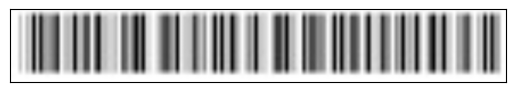

In [6]:
import pyzbar.pyzbar as pyzbar  # pip install pyzbar
import numpy as np              # pip install numpy
import cv2                      # pip install opencv-python
import matplotlib.pyplot as plt


# 바코드 탐지하는 엔진 (바코드 및 QR코드 탐지)
def decode(im):
    # Find barcodes and QR codes
    decodedObjects = pyzbar.decode(im)

    # Print results
    for obj in decodedObjects:
        print('Type : ', obj.type)
        print('Data : ', obj.data, '\n')

    return decodedObjects


# Display barcode and QR code location
def display(im, decodedObjects):
    # Loop over all decoded objects
    for decodedObject in decodedObjects:
        points = decodedObject.polygon

        # If the points do not form a quad, find convex hull
        if len(points) > 4:
            hull = cv2.convexHull(np.array([point for point in points], dtype=np.float32))
            hull = list(map(tuple, np.squeeze(hull)))
        else:
            hull = points;

        # Number of points in the convex hull
        n = len(hull)

        # Draw the convext hull
        for j in range(0, n):
            cv2.line(im, hull[j], hull[(j + 1) % n], (255, 0, 0), 3)
        print('k')
    
    plt.imshow(im)
    plt.xticks([]), plt.yticks([])
    plt.show()

# 파일명 zbar.jpg의 이미지에서 바코드를 탐지하면 해당 코드를 리턴
# Main
if __name__ == '__main__':
    # Read image
    im = cv2.imread('template/barcode.png')

    decodedObjects = decode(im)
    display(im, decodedObjects)